<a href="https://colab.research.google.com/github/dhanyaece/FDP/blob/main/Convneuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content/drive/MyDrive/ASIET')

In [ ]:
pwd

'/content/drive/MyDrive/ASIET'

In [ ]:
import tensorflow as tf
from tensorflow import keras

set seed to generate same random number

In [ ]:
tf.random.set_seed(42)

import matplotlib.pyplot as plt
%matplotlib inline
 
import numpy as np
np.random.seed(42)

import glob
import PIL
from PIL import Image

**UNZIP the images**

**-d where it is to be kept**

In [ ]:
#! unzip '/content/drive/MyDrive/ASIET/Flower_dataset.zip' -d '/content/drive/MyDrive/ASIET/Flower Dataset'

**TO access each files**

**all files represented by **

***/*.jpg **

**ie all jpg files contained in all files** **bold text**

In [ ]:
imgFiles =glob.glob("/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/*/*.jpg")


In [ ]:
for items in imgFiles[:8]:
  print(items)

/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/1031799732_e7f4008c03.jpg
/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/102841525_bd6628ae3c.jpg
/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/100080576_f52e8ee070_n.jpg
/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg
/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg
/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/11642632_1e7627a2cc.jpg
/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/1140299375_3aa7024466.jpg
/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/105806915_a9c13e2106_n.jpg


In [ ]:
print(len(imgFiles))

500


**x and y for input and output**

In [ ]:
x=[]
y=[]

In [ ]:
for fName in imgFiles:
  x_i = Image.open(fName)
  x_i =x_i.resize((299,299)) # resize all images to same size
  x_i= np.array(x_i)/255.0   #normalize all values between 0 and 1
  x.append(x_i)
  label = fName.split("/") # to find the label from the folder name
  y_i =label[7] #ie split by / the folder location will give class name in the seventh position
  y_i # will be the last read folder name
  y.append(y_i)




**label can be separated from /**

**ie from differnt folder** 

In [ ]:
print(y)

['daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandeli

In [ ]:
print(set(y)) # to list unique values

{'dandelion', 'daisy', 'tulip', 'sunflower', 'rose'}


**The network can deal with only numerical data**

**for that use LabelEncoder in sklearn library**

In [ ]:
from sklearn.preprocessing import LabelEncoder
IEncoder=LabelEncoder()
y=IEncoder.fit_transform(y)
print(y)
print(set(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [ ]:
print(IEncoder.classes_) # to know the correct order of the classes as 0, 1, 2 3

['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [ ]:
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(500, 299, 299, 3)
(500,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2, stratify=y,random_state=42)
print("X_train_shape:{}".format(X_train.shape))
print("X_test_shape:{}".format(X_train.shape))


X_train_shape:(400, 299, 299, 3)
X_test_shape:(400, 299, 299, 3)


In [ ]:
# manually scale data
mu=X_train.mean()
std= X_train.std()
X_train_std=(X_train-mu)/std
X_test_std= (X_test-mu)/std


In [ ]:
print(X_train.shape)
print(X_train.shape[0])
print(X_train.shape[:2])
print(X_train.shape[1:])

(400, 299, 299, 3)
400
(400, 299)
(299, 299, 3)


In [ ]:
# construct feature extraction based on CNN
# Create the network using Functional API metho
input_ = keras.layers.Input(shape = X_train.shape[1:])
# Construct the convolution based preprocessing part (feature extractor) 
x = keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu')(input_)
x = keras.layers.MaxPool2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)

# Construct the DNN classifier part

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=1000, activation='relu')(x)
x = keras.layers.Dense(units=100, activation='relu')(x)
output_ = keras.layers.Dense(units=5, activation='softmax')(x)

model_CNN = keras.models.Model(inputs=[input_], outputs=[output_])

In [ ]:
model_CNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 299, 299, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 350464)            0     

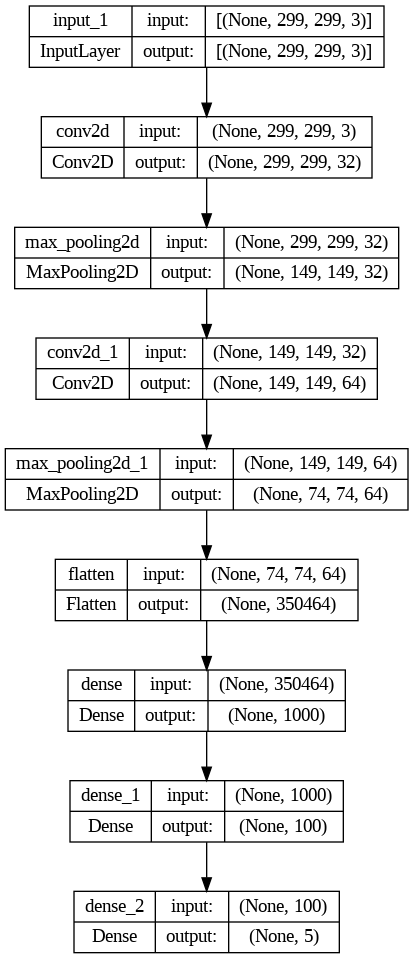

In [ ]:
tf.keras.utils.plot_model(
    model_CNN,
    to_file='model_CNN.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [ ]:
# Compile the network with appropriate settings for loss, optimizer and metrics.
model_CNN.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

#Training the model. 
history_CNN = model_CNN.fit(x=X_train_std, 
                            y=Y_train, 
                            epochs=25, 
                            validation_split=0.1, 
                            batch_size=32)

#history_cnn (dictionary) captures the loss and accuracy in ech epoch and stores 

Epoch 1/25
12/12 [==============================] - 11s 211ms/step - loss: 21.9932 - accuracy: 0.2889 - val_loss: 1.4400 - val_accuracy: 0.3500
Epoch 2/25
12/12 [==============================] - 2s 165ms/step - loss: 1.3692 - accuracy: 0.4167 - val_loss: 1.4336 - val_accuracy: 0.4250
Epoch 3/25
12/12 [==============================] - 2s 166ms/step - loss: 1.2181 - accuracy: 0.5056 - val_loss: 1.3369 - val_accuracy: 0.5000
Epoch 4/25
12/12 [==============================] - 2s 165ms/step - loss: 1.0805 - accuracy: 0.5917 - val_loss: 1.6137 - val_accuracy: 0.4500
Epoch 5/25
12/12 [==============================] - 2s 166ms/step - loss: 0.8175 - accuracy: 0.7056 - val_loss: 1.2238 - val_accuracy: 0.4500
Epoch 6/25
12/12 [==============================] - 2s 166ms/step - loss: 0.5770 - accuracy: 0.8000 - val_loss: 2.0007 - val_accuracy: 0.4750
Epoch 7/25
12/12 [==============================] - 2s 165ms/step - loss: 0.3688 - accuracy: 0.9028 - val_loss: 1.7064 - val_accuracy: 0.4500
Epoc

In [ ]:
history_CNN.history.items()

dict_items([('loss', [21.993200302124023, 1.3692189455032349, 1.2181220054626465, 1.080492377281189, 0.8175461888313293, 0.5769641399383545, 0.3688032031059265, 0.14652426540851593, 0.0945667028427124, 0.0849061980843544, 0.2546975314617157, 0.11267398297786713, 0.05918211489915848, 0.013715844601392746, 0.004004584159702063, 0.0032029475551098585, 0.0019793175160884857, 0.0014742393977940083, 0.000797727145254612, 0.0005964413867332041, 0.00046513808774761856, 0.0003912773681804538, 0.0003311492328066379, 0.0002889974566642195, 0.00025113284937106073]), ('accuracy', [0.2888889014720917, 0.4166666567325592, 0.5055555701255798, 0.5916666388511658, 0.7055555582046509, 0.800000011920929, 0.9027777910232544, 0.9722222089767456, 0.980555534362793, 0.980555534362793, 0.949999988079071, 0.9722222089767456, 0.9833333492279053, 0.9972222447395325, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), ('val_loss', [1.439955711364746, 1.4336134195327759, 1.3369221687316895, 1.6137065887451172,

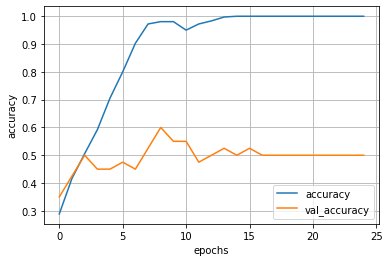

In [ ]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_CNN.history.items() if k in keys} #returns the training accuracy and validation accuracy as two separate lists,
                                                                      #attached with the keys in a dictionary format 

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

**here training accuracy very high and validation accuracy very less .. ie over fitting**

**Evaluate the model**

In [ ]:
# Pass the appropriate arguments for evaluate function.
test_loss, test_accuracy = model_CNN.evaluate(X_test_std, Y_test)

print("Test-loss: %f, Test-accuracy: %f" % (test_loss,  test_accuracy))

4/4 [==============================] - 0s 95ms/step - loss: 3.1449 - accuracy: 0.4300
Test-loss: 3.144933, Test-accuracy: 0.430000


In [ ]:
cProba = model_CNN.predict(X_test_std[:10])

print(cProba)

1/1 [==============================] - 1s 643ms/step
[[1.54251223e-09 4.24142492e-11 9.99998689e-01 2.04657306e-14
  1.26295481e-06]
 [2.58738883e-02 1.86210796e-02 2.09659949e-01 7.04531848e-01
  4.13131639e-02]
 [3.20225030e-01 1.23800695e-01 5.08798659e-02 2.60915965e-01
  2.44178489e-01]
 [3.36974412e-02 4.60265130e-01 2.76564628e-01 5.26639745e-02
  1.76808774e-01]
 [7.89702088e-02 2.81090033e-03 1.04310061e-03 9.08665299e-01
  8.51046294e-03]
 [1.15715012e-01 1.11449603e-02 2.48423204e-01 9.60316658e-02
  5.28685153e-01]
 [9.54469681e-01 4.38871421e-02 6.21732092e-04 6.57297729e-04
  3.64072475e-04]
 [4.55647521e-03 5.45439889e-06 9.94232595e-01 8.47821156e-08
  1.20541546e-03]
 [1.72312863e-19 1.80679802e-23 9.68103534e-29 1.00000000e+00
  4.10479317e-22]
 [1.90723822e-01 7.93210447e-01 1.23703200e-02 1.89120183e-03
  1.80423434e-03]]


In [ ]:
cLabel = np.argmax(cProba,axis=-1) 

print(cLabel)

[2 3 0 1 3 4 0 2 3 1]


In [ ]:


print(Y_test[:10])



[2 3 2 0 0 3 1 2 3 4]
